In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import cortex
import numpy as np
import os
from cnbpy.pycortex_vis import basic_plot,zoomed_plot2,zoomed_plot, zoomed_alpha_plot, zoomed_alpha_plot2,load_example
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Preliminary

To run this demo, you will need to: 

1. Install this package (i.e. via pip install git

2. [Install pycortex](https://gallantlab.github.io/pycortex/install.html) , and its dependencies, blender and inkscape. I use blender 2.79 and inkscape 1.0.
3. Import [these subjects] into your pycortex subject database - the path for which can be obtained as follows:

```python
cortex.database.default_filestore
```

4. I also use the [cubehelix_alpha]() colormap for some of these examples, which isn't part of the default selection. You will need to place this in your colormaps directory. The location for this will be the same as your pycortex database, but replacing /db with /colormaps. For instance, my subject database is /Users/nicholashedger/anaconda2/envs/py3env/share/pycortex/db and so the colormaps will be in /Users/nicholashedger/anaconda2/envs/py3env/share/pycortex/colormaps

5. The data itself is bundled with the github repository.

## Demo 1. Importing a subject.

I have a subject that exists in my freesurfer directory. Importing this into pycortex is extremely simple.

In [3]:
cortex.freesurfer.import_subj(fs_subject='fsaverage5',cx_subject='fsaverage5')

b'created by greve on Tue Sep 22 16:53:58 2009\n'
b'created by greve on Tue Sep 22 16:46:59 2009\n'
b'created by greve on Tue Sep 22 17:14:26 2009\n'
b'created by greve on Tue Sep 22 17:07:31 2009\n'
b'created by greve on Tue Sep 22 16:53:58 2009\n'
b'created by greve on Tue Sep 22 17:14:26 2009\n'
b'created by greve on Tue Sep 22 16:46:59 2009\n'
b'created by greve on Tue Sep 22 17:07:31 2009\n'
b'created by greve on Fri Oct 16 13:43:32 2009\n'
b'created by greve on Fri Oct 16 13:47:19 2009\n'


fsaverage5 now exists in our database. We can retrieve the surfaces as follows:

In [4]:
cortex.database.db.fsaverage5.surfaces

Surfaces: [wm, pia, inflated]

In [5]:
infl=cortex.database.db.fsaverage5.surfaces.inflated.get()
pia=cortex.database.db.fsaverage5.surfaces.pia.get()
wm=cortex.database.db.fsaverage5.surfaces.wm.get()

In [6]:
infl[1][0].shape

(10242, 3)

That was easy!

Likewise, there is an [equivalent command](https://gallantlab.github.io/auto_examples/import_surface/import_fmriprep.html) for importing from fmriprep

To verify that everything is working, we should try to visualise some surfaces.

Here I load some retinotopy data. These are sampled to fsaverage5 (10242 vertice per hemisphere) space.

In [7]:
retinotopy=load_example()

These are different parameters from a retinotopy experiment. 

In [60]:
retinotopy

,Unnamed: 0,R2,sigma,isigma,ecc,iecc,ang,iang,X,Y,ROI,idx
0,0,27.695471,10.000000,0.0,4.853912,0.0,303.864723,0.0,-4.030473,2.704765,0.0,0.0
1,1,56.418604,2.472724,0.0,0.632930,0.0,163.553058,0.0,0.179200,-0.607032,0.0,1.0
2,2,4.057080,0.564935,0.0,30.484376,0.0,271.545341,0.0,-30.473289,0.822103,0.0,2.0
3,3,1.943642,1.174882,0.0,50.340255,0.0,173.334591,0.0,5.843050,-50.000000,0.0,3.0
4,4,44.977633,10.000000,0.0,28.175164,0.0,326.041273,0.0,-15.738522,23.369613,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
174079,174079,1.217643,0.091271,0.0,8.939628,0.0,19.680636,0.0,3.010662,8.417414,0.0,10237.0
174080,174080,12.250593,0.043489,0.0,8.794593,0.0,303.347017,0.0,-7.346621,4.834463,0.0,10238.0
174081,174081,11.000975,0.126009,0.0,14.131123,0.0,74.575093,0.0,13.622118,3.758528,0.0,10239.0
174082,174082,7.297563,0.006690,0.0,9.910025,0.0,295.217656,0.0,-8.965558,4.222246,0.0,10240.0


For now, lets just plot the variance explained (R2) by the population receptive field model. 

To visualise surface data in pycortex, we leverage the [vertex class](https://gallantlab.github.io/generated/cortex.dataset.Vertex.html)

Note that there are essentially 5 arguments to this.

```python
cortex.Vertex(data,subject,cmap,vmin,vmax)
```

1. The first, *data* is the data we want to plot on the surface. This must, of course, have the same dimensionality as the number of vertices in our surface, which for fsaverage5 is 10242 for each hemisphere (20484 in total). 

2. The second, *subject* is the name of the subject in the pycortex database.

3. The third, *cmap* is the [colormap](https://gallantlab.github.io/colormaps.html) we want to use to plot the data.

3. The fourth, *vmin* is the minimum value of the data in the colormap.

4. The fifth, *vmax* is the maximum value of the data in the colormap.

In [10]:
R2dat=cortex.Vertex(data=np.array(retinotopy['R2']),subject='fsaverage5',cmap='plasma',vmin=0,vmax=100)

Let's open up a webviewer to visualise this data. This will open up a new tab in our browser.

In [11]:
cortex.webshow(R2dat)

Generating new ctm file...
wm
wm
inflated
inflated
Started server on port 6729


<JS: window.viewer>

## Demo 2. Flattening cortical surfaces. 

We currently do not have a flattened surface of the brain. 

I made an extensive guide to cutting and flattening surfaces [here](https://drive.google.com/file/d/1S_dFeq_oFeVokdIy0YTHtgOuhTHjqh1A/view). Here, I will just give a quick demonstration.

The first step to this involves packaging some data to guide cutting. For instance, here I include polar angle and eccentricity estimates as well as a parcellation of visual cortex.

In [12]:
angdat=cortex.Vertex(data=np.array(retinotopy['ang']),subject='fsaverage5',vmin=0,vmax=360,cmap='Retinotopy_RYBCR')
eccdat=cortex.Vertex(data=np.array(retinotopy['ecc']),subject='fsaverage5',vmin=0,vmax=15,cmap='nipy_spectral')
PCLDAT=cortex.Vertex(data=np.array(retinotopy['ROI']),subject='fsaverage5',vmin=0,vmax=15,cmap='gist_ncar')

I now package this into a 'dataset' object, which is essentially a collection of vertex objects.

In [13]:
# Create empty dataset
my_retinotopy=cortex.Dataset()
my_retinotopy.views['angle']=angdat
my_retinotopy.views['eccentricity']=eccdat
my_retinotopy.views['ROI']=PCLDAT

my_retinotopy.description='my_retinotopy'  

In [14]:
cortex.segment.cut_surface(cx_subject='fsaverage5',hemi='lh',name='retinotopy_flat',fs_subject='fsaverage5',data=my_retinotopy)

b'created by greve on Fri Oct 16 13:43:32 2009\n'
b'\n'
Vert check ok!
/Users/nicholashedger/anaconda2/envs/py3env/share/pycortex/db/fsaverage5/anatomicals/cutsurf[hemi=lh,name=retinotopy_flat].blend
b'created by greve on Tue Sep 22 16:53:58 2009\n'
b'created by greve on Fri Oct 16 13:43:32 2009\n'
In new named temp file: /var/folders/wj/n43w35jn4b77cmr_tl630q480000gn/T/tmpoijogz63
adding cut data
with open('/var/folders/wj/n43w35jn4b77cmr_tl630q480000gn/T/tmp853gtith', 'rb') as fp:
            u = xdrlib.Unpacker(fp.read())
            mesh = u.unpack_string().decode('utf-8')
            name = u.unpack_string().decode('utf-8')
            hemdat= u.unpack_array(u.unpack_double)
            ccolor = blendlib._repack(hemdat)
            blendlib.add_vcolor(ccolor, mesh, name)
        
In new named temp file: /var/folders/wj/n43w35jn4b77cmr_tl630q480000gn/T/tmp7uzcirg3
with open('/var/folders/wj/n43w35jn4b77cmr_tl630q480000gn/T/tmpnkxh2uv7', 'rb') as fp:
            u = xdrlib.Unpacker(

Flattening takes approximately 2 hours! Continue?  no


Not going to flatten...


## Demo 3. Plot data and use this to draw an ROI.

Now I would like to use data to draw a region of interest. 

In my case, I am using retinotopy data - and so I want to use polar angle reversals to locate the boundary between V1 and V2.

In principle, I could use any data to define an ROI (e.g. thresholded t statistics to draw regions responsive to faces.)

In [15]:
retinotopy2=load_example(demo=2)

First, I want to define some data to guide drawing the region of interest. I therefore select the polar angle data and the *Retinotopy_RYBCR* colormap which is optimised for viewing polar angle data.

This time, I leverage the Vertex2D class. This allows me to weight transparency by variance explained. This means that my drawing of the ROI to be guided by parameter estimates that have better variance explained. 

(process:50147): Gtk-WARNING **: 16:24:51.751: Locale not supported by C library.
	Using the fallback 'C' locale.
Background RRGGBBAA: ffffff00
Area 0:0:2231.65:1024 exported to 2232 x 1024 pixels (96 dpi)


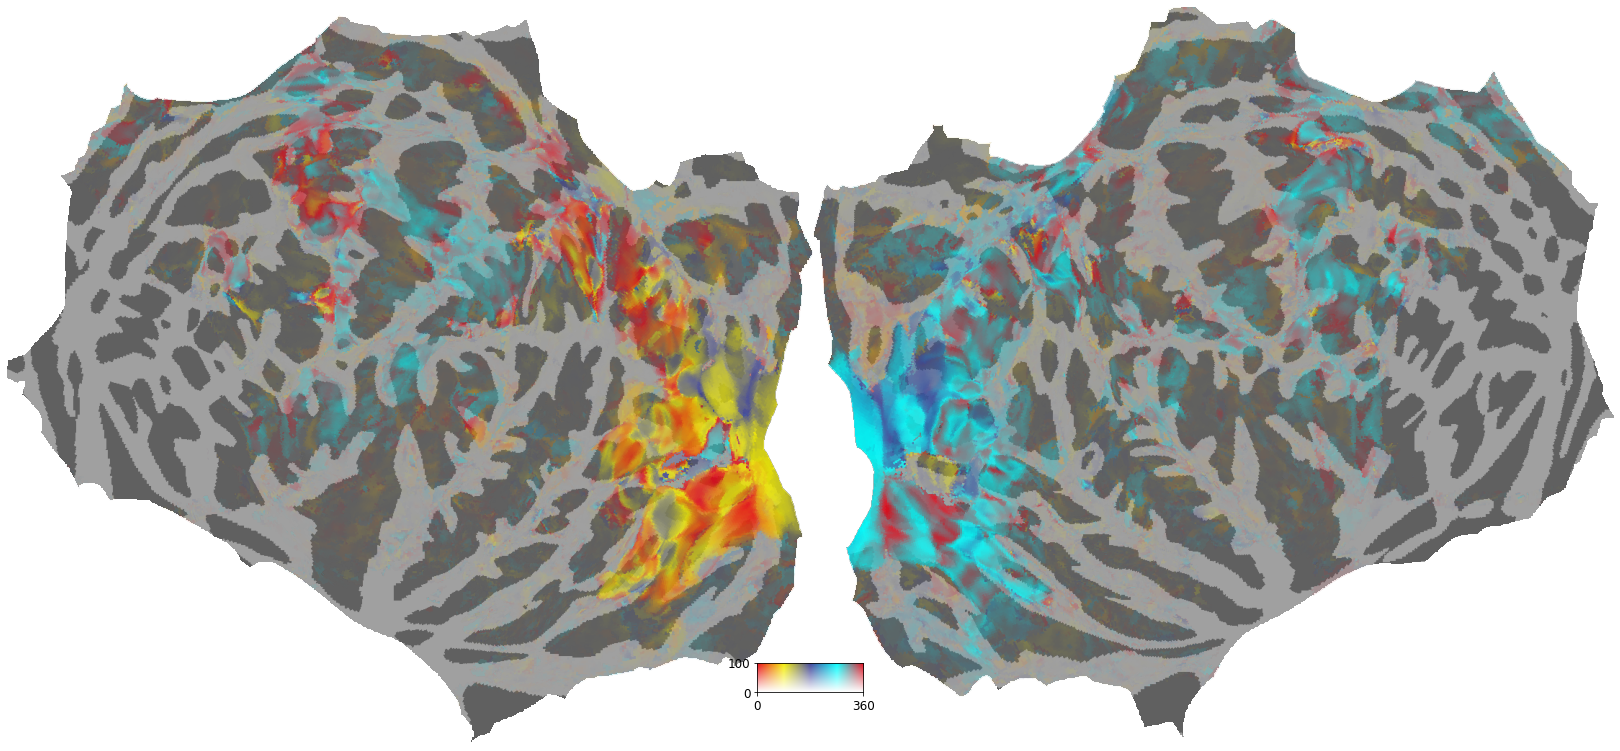

In [17]:
angdat=cortex.Vertex2D(np.array(retinotopy2['ang']),np.array(retinotopy2['R2']),subject='fsaverage',vmin=0,vmax=360,vmin2=0,vmax2=100,cmap='Retinotopy_RYBCR_alpha')
a=cortex.quickshow(angdat,with_curvature=True)

The command to draw the ROI is as follows. The first argument is the data we use to guide drawing the ROI. The second is the label we want to assign to this ROI. Executing this will open up inkscape.

In [18]:
cortex.utils.add_roi(angdat,'V1')

['inkscape', '/Users/nicholashedger/anaconda2/envs/py3env/share/pycortex/db/fsaverage/overlays.svg']


0

After drawing this ROI, I can now retrieve the vertices within the region I just drew.

In [158]:
V1verts=cortex.utils.get_roi_verts('fsaverage','V1')
V1verts

{'V1': array([   348,    442,    443, ..., 325800, 325801, 325802])}

I can then use these to subset the data.

In [154]:
V1subset=retinotopy2.iloc[V1verts['V1']]

And plot, for instance, the visual field coverage of the receptive fields in V1.

(-5.0, 5.0)

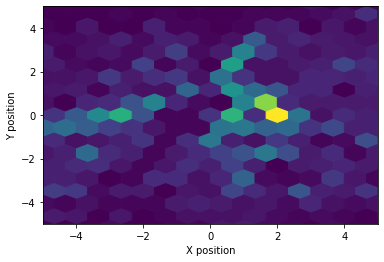

In [185]:
plt.hexbin(V1subset['X'], V1subset['Y'],gridsize=150)
plt.xlabel("X position")
plt.ylabel("Y position")

plt.ylim(-5,5)
plt.xlim(-5,5)

Moreover, I can zoom in on this ROI.

(process:50743): Gtk-WARNING **: 16:27:02.244: Locale not supported by C library.
	Using the fallback 'C' locale.
Fontconfig warning: ignoring UTF-8: not a valid region tag
Background RRGGBBAA: ffffff00
Area 0:0:2231.65:1024 exported to 2232 x 1024 pixels (96 dpi)
[-42.697342, 11.089874, -87.27784, 13.518456]


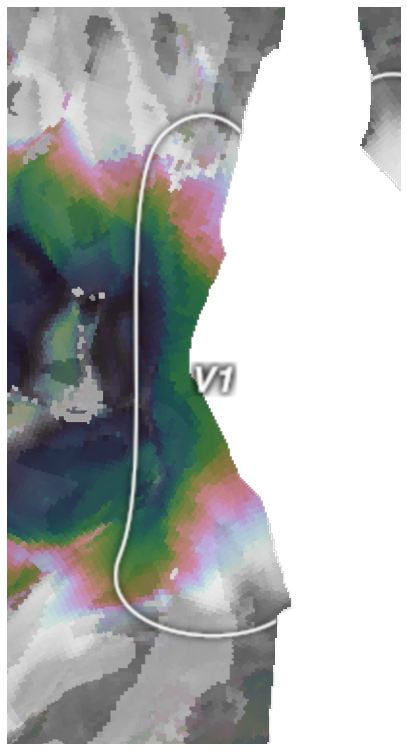

In [20]:
zoomed_alpha_plot(retinotopy2['ecc'],retinotopy2['R2'],vmin=0,vmax=8,vmin2=0,vmax2=100,ROI='V1',hem='left',subject='fsaverage',rois=True,cmap='cubehelix_alpha')

I can also create custom zoom boxes based on coordinates from the centre from the flatmap

(process:50833): Gtk-WARNING **: 16:27:25.209: Locale not supported by C library.
	Using the fallback 'C' locale.
Fontconfig warning: ignoring UTF-8: not a valid region tag
Background RRGGBBAA: ffffff00
Area 0:0:2231.65:1024 exported to 2232 x 1024 pixels (96 dpi)


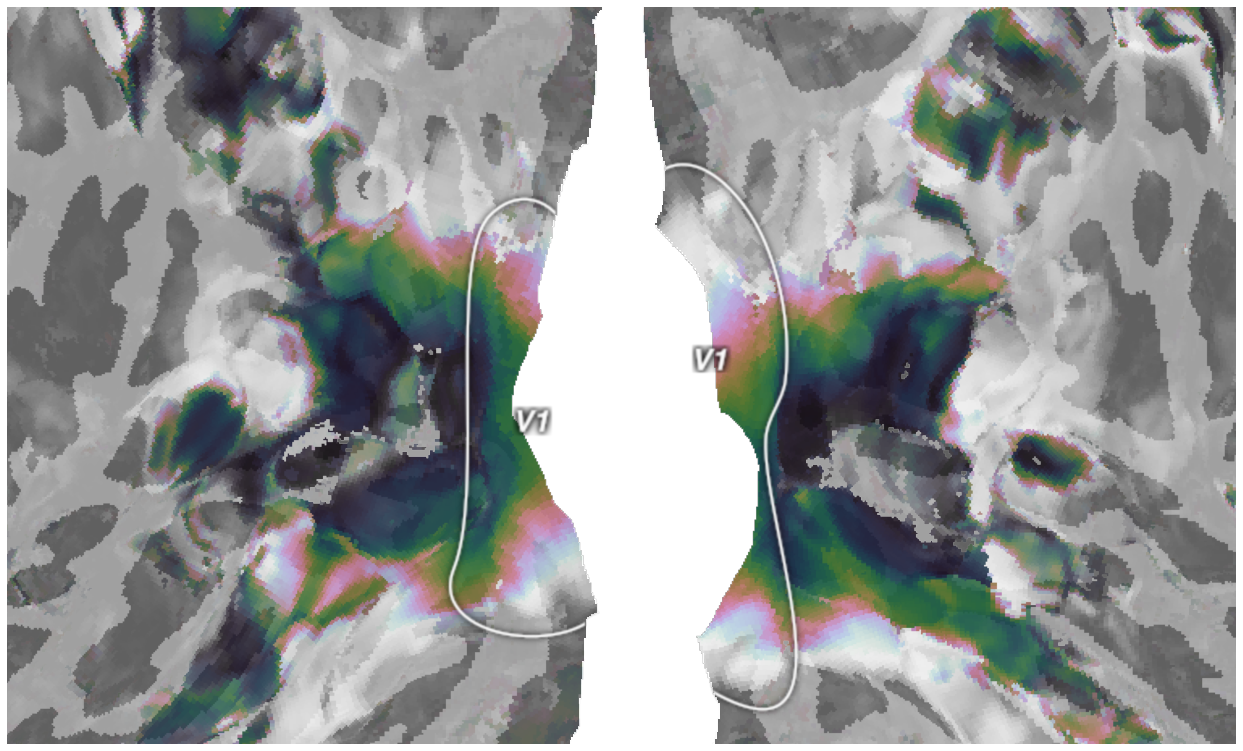

In [21]:
zoomed_alpha_plot2(retinotopy2['ecc'],retinotopy2['R2'],vmin=0,vmax=8,vmin2=0,vmax2=100,subject='fsaverage',rois=True,cmap='cubehelix_alpha',rect=[-100,100,-90,30])

## Example 3: Web-based viewer

Here I show how to interact with the webGL viewers in a little more depth. I demonstrate how to create a set of screenshots automatically, create static versions of the webGL viewer - and illustrate how to share interactive viewers. 

For this demo, I first load some data from [this preprint](https://www.biorxiv.org/content/10.1101/2021.07.05.447566v1)

In [22]:
tonotopy=load_example(demo=3)

In [23]:
tonotopy

,Mu,Sigma,Exponent,R2,FWHM,Speech,Speech_beta,PCA_1,PCA_2,PCA_3
0,1005.821533,0.234639,1.172118,-0.004795,NaN,NaN,NaN,NaN,NaN,NaN
1,328.909149,1.888457,0.328090,0.009978,NaN,NaN,NaN,NaN,NaN,NaN
2,690.719666,0.025240,0.315979,0.018396,NaN,NaN,NaN,NaN,NaN,NaN
3,2149.598877,0.007962,0.292225,0.008727,NaN,NaN,NaN,NaN,NaN,NaN
4,3067.180176,1.098045,0.079610,0.203121,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
118579,2830.782715,0.003393,0.837491,-0.005856,NaN,NaN,NaN,NaN,NaN,NaN
118580,1457.869995,0.015812,0.228823,-0.007104,NaN,NaN,NaN,NaN,NaN,NaN
118581,3074.384521,0.003436,0.960476,-0.004177,NaN,NaN,NaN,NaN,NaN,NaN
118582,3952.884277,0.018864,0.231458,-0.001245,NaN,NaN,NaN,NaN,NaN,NaN


These are parameters from an auditory receptive field model, as described in the preprint. 

I created a webplotter class that wraps around cortex.webshow.

In [119]:
from cnbpy.pycortex_vis import webplotter

We create lists of some data, colormaps, limits and labels for the data. The variable defined in *alpha* is used for transparency weighting.  

In [190]:
vars2plot=['Mu','R2','Exponent','PCA_1','PCA_2','PCA_3']
data=[np.array(tonotopy[var]) for var in vars2plot]
alpha=[np.array(tonotopy['R2']) for i in range(len(vars2plot))]
cmaps=['nipy_spectral','plasma','cubehelix','RdBu','RdBu','RdBu']
lims=[[500,3000],[0,0.3],[0.1,0.4],[-3,3],[-3,3],[-3,3]]

In [144]:
mp=webplotter(data=data,alpha=alpha,lims=lims,cmaps=cmaps,labels=vars2plot,subject='hcp_999999',outpath='/Users/nicholashedger/Documents/tmp',port=1230)

This packages all the data into vertex objects and puts them all into a webviewer. We can load this with show(). 

In [145]:
mp.show()

Started server on port 1230


We can also load a yaml file that contains a set of parameters to send to the webviewer.

In [186]:
import pkg_resources
DATA_PATH = pkg_resources.resource_filename('cnbpy', 'test/data')
my_yml=os.path.join(DATA_PATH,'pycortex_config.yml')
mp.internalize_plot_yaml(my_yml)

We now have a set of parameters from which we can manipulate the webviewer and create screenshots.

In [189]:
mp.camera_dicts

[{'camera.azimuth': 67,
  'camera.altitude': 76,
  'surface.{subject}.unfold': 0.5,
  'surface.{subject}.depth': 0.5,
  'camera.radius': 154,
  'surface.{subject}.curvature.brightness': 0.39},
 {'camera.azimuth': 67,
  'camera.altitude': 76,
  'surface.{subject}.unfold': 0.5,
  'surface.{subject}.depth': 0.5,
  'camera.radius': 255,
  'surface.{subject}.curvature.brightness': 0.39},
 {'camera.azimuth': 67,
  'camera.altitude': 76,
  'surface.{subject}.unfold': 0.1,
  'surface.{subject}.depth': 0.5,
  'camera.radius': 154,
  'surface.{subject}.curvature.brightness': 0.39},
 {'camera.azimuth': 67,
  'camera.altitude': 76,
  'surface.{subject}.unfold': 0.1,
  'surface.{subject}.depth': 0.5,
  'camera.radius': 255,
  'surface.{subject}.curvature.brightness': 0.39},
 {'camera.azimuth': 290,
  'camera.altitude': 76,
  'surface.{subject}.unfold': 0.5,
  'surface.{subject}.depth': 0.5,
  'camera.radius': 154,
  'surface.{subject}.curvature.brightness': 0.39},
 {'camera.azimuth': 290,
  'camera

Make_all_snaps will cycle through all the data and all the camera angles and save all of the relevant images to the output directory. 

In [147]:
mp.make_all_snaps()

We can also create a static brain viewer that exists permanently on our filesystem. This is stored with the html, javascript, data, etc

In [35]:
mp.make_static()

Generating new ctm file...
wm
wm
inflated
inflated
Stopping server


We can also use a webserver to host this online in a [web-based app](https://sharp-ride-1e7b77.netlify.app/)